# CASE STUDY: FASHION CLASS CLASSIFICATION 

# 1. PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

# 2. DATA

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [36]:
df_train = pd.read_csv('input/fashion-mnist_train.csv',sep=',')
df_test = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

# 3. VISUALIZATION OF THE DATASET  

Let's display the dataframe. 784 indicates 28x28 pixels and 1 column for label:

In [37]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's check how many data are in train and test datasets:

In [39]:
df_train.shape

(60000, 785)

In [40]:
df_test.shape

(10000, 785)

Let's create training and testing arrays:

In [41]:
training = np.array(df_train, dtype = 'float32')
testing = np.array(df_test, dtype = 'float32')

Below we are going to plot a grid of default figures by defining grid dimensions 15x15. Subplots return figure object and axes object. We can use the axes object to plot specific figures at various locations. Next, 15x15 matrix is flattened into 225 array and length of training dataset is set.
A random number from 0 to n_training is selected and random figure is plotted accordingly.

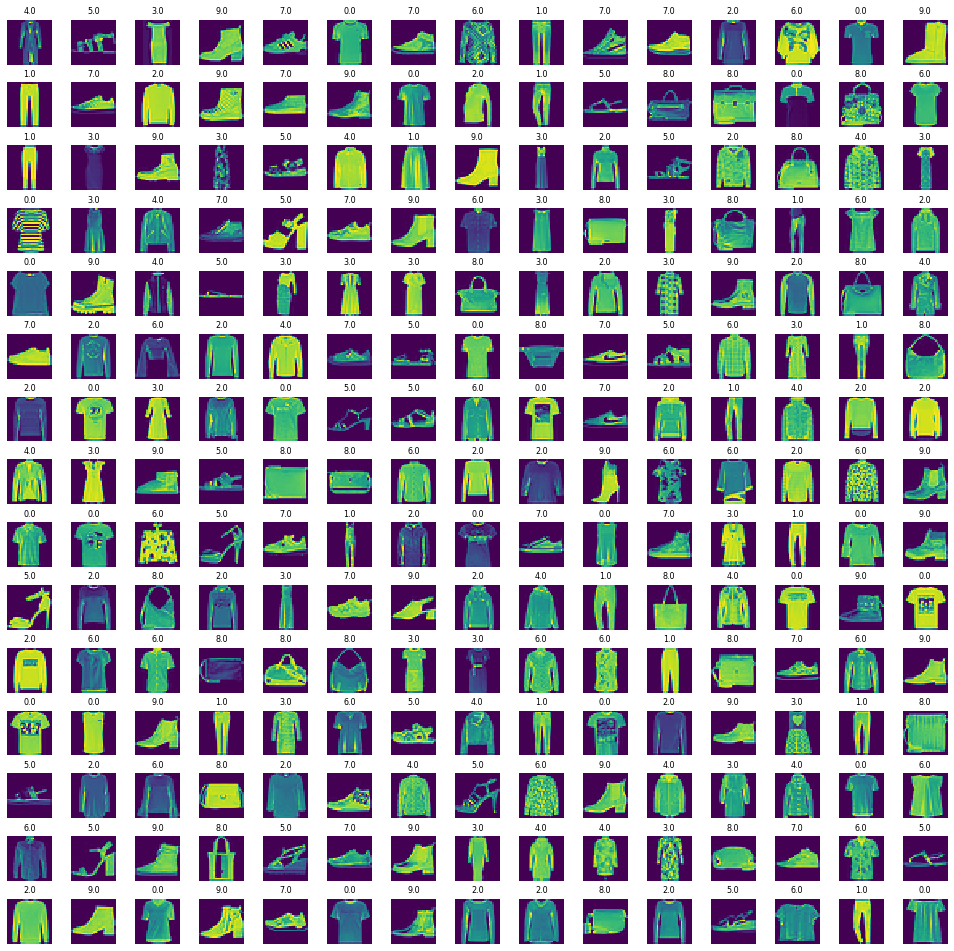

In [42]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Classes:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# 4. TRAINING THE MODEL

Training and testing datasets are prepared:

In [51]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

Let's create validation dataset. A validaton dataset can be used during training, it is used to help the model to generalize. We would like to simply avoid overfitting.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

Now we are going to take our training, testing and validating data and put in a form that will fit to out convolutional neural network, so we will need to reshape our data so that they are in a form (28,28,1)

In [53]:
X_train.shape

(48000, 784)

In [54]:
X_test.shape

(10000, 784)

In [55]:
X_validate.shape

(12000, 784)

In [56]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [57]:
X_train.shape

(48000, 28, 28, 1)

In [58]:
X_test.shape

(10000, 28, 28, 1)

In [59]:
X_validate.shape

(12000, 28, 28, 1)

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [62]:
cnn_model = Sequential()

After creating our model, we are going to add our layers. At first, Conv2D layer is added, with 32 kernels of size 3x3, with input shape equal to our image shape and RELU activation function.


In [61]:


# Try 32 fliters first then 64
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  # This is added back by InteractiveShellApp.init_path()


In [36]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [38]:
epochs = 10

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 584us/step - loss: 0.3092 - acc: 0.8914 - val_loss: 0.3038 - val_acc: 0.8947
Epoch 2/10
48000/48000 [==============================] - 26s 533us/step - loss: 0.2990 - acc: 0.8955 - val_loss: 0.2979 - val_acc: 0.8970
Epoch 3/10
48000/48000 [==============================] - 25s 529us/step - loss: 0.2926 - acc: 0.8969 - val_loss: 0.2870 - val_acc: 0.9013
Epoch 4/10
48000/48000 [==============================] - 26s 535us/step - loss: 0.2841 - acc: 0.9007 - val_loss: 0.2831 - val_acc: 0.9030
Epoch 5/10
48000/48000 [==============================] - 25s 528us/step - loss: 0.2786 - acc: 0.9009 - val_loss: 0.2809 - val_acc: 0.9013
Epoch 6/10
48000/48000 [==============================] - 25s 531us/step - loss: 0.2745 - acc: 0.9037 - val_loss: 0.2777 - val_acc: 0.9010
Epoch 7/10
48000/48000 [==============================] - 25s 523us/step - loss: 0.2685 - acc: 0.9055 - val_loss: 0.

# STEP #5: EVALUATING THE MODEL

In [39]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 270us/step
Test Accuracy: 0.907


In [40]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

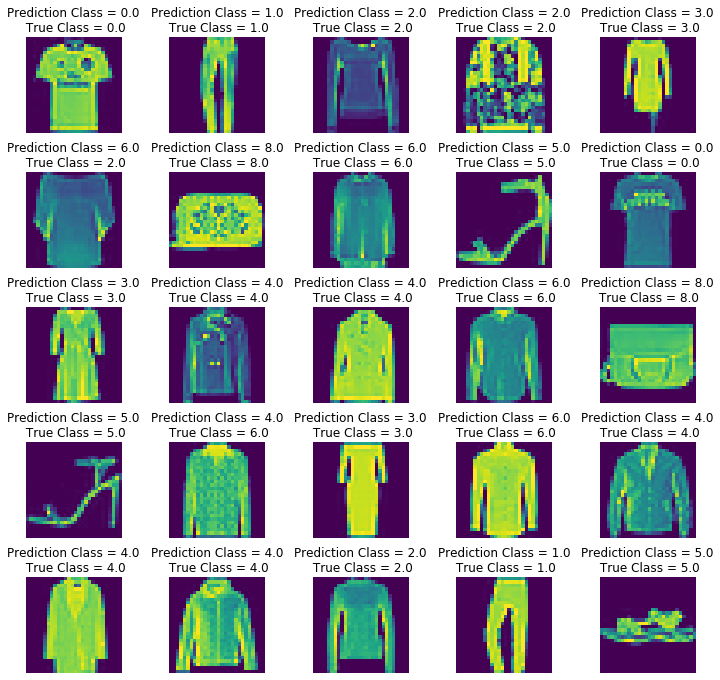

In [46]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

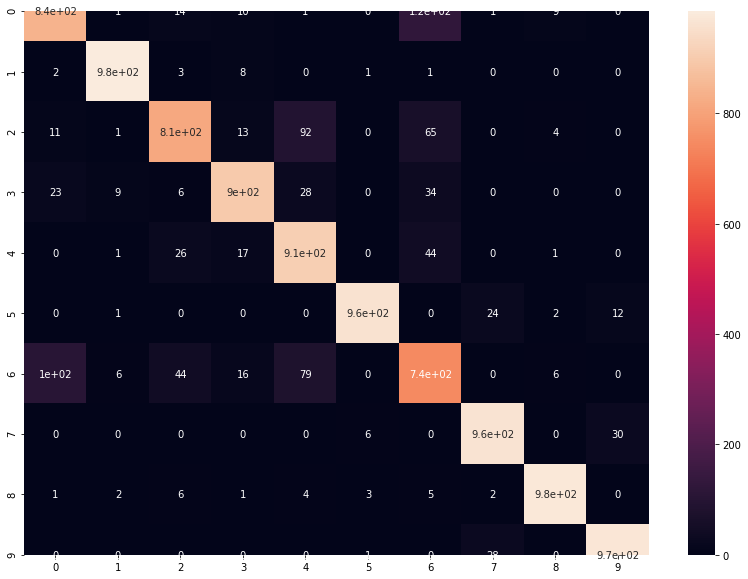

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [50]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class: {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Class: 0       0.86      0.84      0.85      1000
    Class: 1       0.98      0.98      0.98      1000
    Class: 2       0.89      0.81      0.85      1000
    Class: 3       0.93      0.90      0.92      1000
    Class: 4       0.82      0.91      0.86      1000
    Class: 5       0.99      0.96      0.97      1000
    Class: 6       0.73      0.74      0.74      1000
    Class: 7       0.95      0.96      0.95      1000
    Class: 8       0.98      0.98      0.98      1000
    Class: 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

